# Probability Notebook
Author: Lawrence Lechuga 
Date: 08/21/2020
## Import useful packages

In [29]:
%matplotlib inline
from matplotlib.figure import Figure
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats.contingency import margins

# Function to create the necessary arrays for a bivariate distribution
def initial_conditions(mu, Sig):
    """Create the initial conditions for a bivariate normal here.
    This will take the mean vector, mu and a covariance matrix Sig
    Default values have been picked."""
    N =100
    limsx = [(mu[0]-4),(mu[0]+4)]
    limsy = [(mu[1]-4),(mu[1]+4)]
    # Create the axes and mesh grid
    X = np.linspace(limsx[0],limsx[1],N)
    Y = np.linspace(limsy[0],limsy[1],N)
    X,Y = np.meshgrid(X,Y)
    #Pack X and Y into a single 3D array
    pos = np.zeros(X.shape +(2,))
    pos[:,:,0] = X
    pos[:,:,1]= Y
    return X,Y,pos

def isPosSemDef(A, tol=1e-8):
    # checks if matrix is Positive semi definite
    Eig = np.linalg.eigvalsh(A)
    return np.all(Eig > -tol)
def check_symmetry(A, tol=1e-08):
        # checks if matrix is symmetric
    return np.allclose(A, A.T, rtol=tol, atol=tol)

# Bivariate distribution
Here we will create and visualize a bivariate distribution that is defined in the following way:
\begin{equation*}
f(\overrightarrow{x}) = \frac{1}{\sqrt{(2\pi)^{2} \text{ det}(H) }}exp(-\frac{1}{2}(x-\mu)^T\cdot H^{-1} \cdot (x-\mu))
\end{equation*}

Where $\mu$ is a 2D vector: 
\begin{equation*}
\mathbf{\mu} =  \begin{pmatrix}
\ \mu_{x} \\
\ \mu_{y}
\end{pmatrix}
\end{equation*}

The covariance matrix, H, defined as:
\begin{equation*}
\mathbf{H} = \begin{pmatrix}
\ \sigma_{xx}^{2} & \sigma_{xy}^{2} \\
\ \sigma_{yx}^{2} & \sigma_{yy}^{2}
\end{pmatrix}
\end{equation*}

Notice that $\sigma_{xx}^2$ and $\sigma_{yy}^2$ represent the variance in x and y, and the off-diagonals represent the covariance terms.
## Visualization of the bivariate distribution
### Exercise 1: Create and plot the bivariate distribution
From the Scipy package we will use the mutlivariate_normal function to create and visualize a bivariate distribution.  
1. ***Attempt the following:***
    - Run following cell with the default parameters for $\mu$ and $H$
    - Change the $\mu$ vector to a different value/direction
    - Change the $H$ matrix to different values  

2. ***Discuss and answer the following:***

    - What happens when you change $\mu$?
        - What happens when you change $H$?
        - Are there restrictions on the values you can choose? What are they?
    - Does the shape depend on $H$?
        - How do we make it more/less oblong?
        - What does the shape indicate about the PDF?

***Note:*** Ensure that your selected values for your covariance matrix, "Sig", satisfy some properties:
1. The covariance needs to be symmetric: $cov(x,y) = cov(y,x)$
2. The covariance needs to be postive semi-definite: $(x-\mu)^T \cdot H_{xy} \cdot (x-\mu)\geq0 \text{ for all } x \in \mathbb{R}^n$

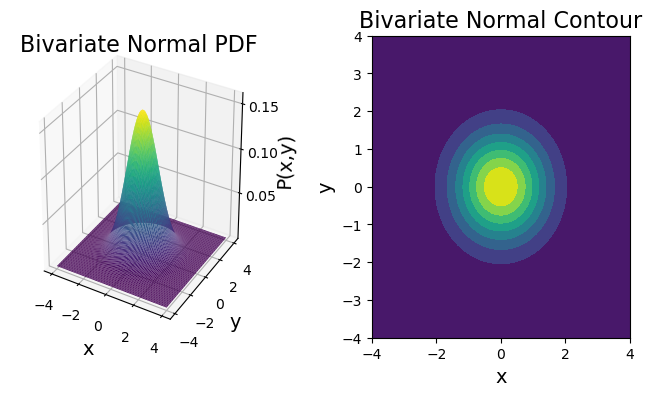

In [33]:
#---------------- Define the initial parameters, mu and H (Sig): ------------------------------------

mu = np.array([0.0,0.0]) # (mu_x, mu_y) modify if you want to change the mean
Sig = np.array([[1.0, 0],[0,1.0]]) # modify if you want to change the covariance
#----------------------------------------------------------------------------------------------------

# ---------Error checking the covariance matrix!-----------------------------------------------------
if (isPosSemDef(Sig) == False or check_symmetry(Sig) == False):
    if (isPosSemDef(Sig) == False and check_symmetry(Sig) == False):
        raise SyntaxError('Your Covariance matrix is not positive semi definite and is not symmetric! -Your TA')
    elif (isPosSemDef(Sig) == False):
        raise SyntaxError('Your Covariance matrix is not positive semi definite! -Your TA')
    elif (check_symmetry(Sig) == False):
        raise SyntaxError('Your Covariance matrix is not symmetric! -Your TA')
# ---------End Error checking the covariance matrix!-------------------------------------------------

X,Y,pos = initial_conditions(mu,Sig) # this function will return the meshgrid and necessary matrices
dx = X[0,1]-X[0,0]
F = multivariate_normal(mu, Sig)
# F = multivariate_normal(mu, Sig,allow_singular=True) # Allows visualization of singular cov matrices
Z = F.pdf(pos)

fig1 = plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(121, projection = '3d')
ax1.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax1.set_title('Bivariate Normal PDF',fontsize = 16)
ax1.set_xlabel('x', fontsize = 14)
ax1.set_ylabel('y',fontsize = 14)
ax1.set_zlabel('P(x,y)',fontsize = 14)

ax2 = fig1.add_subplot(122)
ax2.contourf(X, Y, Z, cmap='viridis')
ax2.set_title('Bivariate Normal Contour',fontsize = 16)
ax2.set_xlabel('x', fontsize = 14)
ax2.set_ylabel('y',fontsize = 14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()

### Exercise 2: Explore the effect of covariance
As we seen in exercise 1, covariance has a strong effect on the overall symmetry and shape of our bivariate (and can be generalized to the n-dimensional multivariate case). Recall: We have seen that the covariance matrix also has some interesting requirements such as:
1. The covariance is symmetric
2. The covariance is postive semi-definite
  
***In the following cell:***  
1. Select the coordinate for the profile you wish to see and run with the default mean and covariance matrix
2. Test with differing covariance/variance values and different profiles

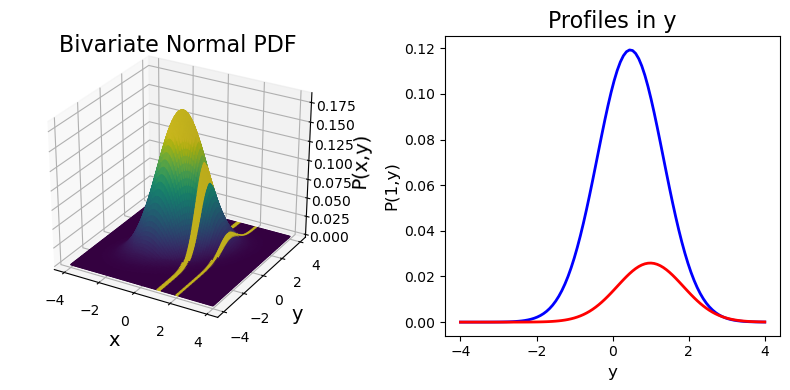

In [39]:
#---------------- Define the initial parameters, mu and H (Sig): ------------------------------------
mu = np.array([0.0,0.0]) # (mu_x, mu_y) modify if you want to change the mean
Sig = np.array([[1.0, 0.5],[0.5,1.0]]) # modify if you want to change the covariance
yprof = 1 # Coordinate of the y profile (within mu_x+4 to mu_x-4)
xprof = 1 # Coordinate of x profile (within mu_y+4 to mu_y-4)

direction = 1 # pick 0 if you want to look at the x direction and 1 if you want to view the y direction
#----------------------------------------------------------------------------------------------------
yprof2 =yprof +1 # second profile location
xprof2 = xprof +1 # secont profile location

ax1.clear()
ax2.clear()

X,Y,pos = initial_conditions(mu,Sig)
dx = X[0,1]-X[0,0]
F = multivariate_normal(mu, Sig)
Z = F.pdf(pos)

#--- Calculate the indices that correspond to the coordinate chosen ---
ymin = int((yprof-Y[0,0])/dx); ymax = int(((yprof+.2)-Y[0,0])/dx);
xmin = int((xprof-X[0,0])/dx); xmax = int(((xprof+.2)-X[0,0])/dx);

ymin2 = int((yprof2-Y[0,0])/dx); ymax2 = int(((yprof2+.2)-Y[0,0])/dx);
xmin2 = int((xprof2-X[0,0])/dx); xmax2 = int(((xprof2+.2)-X[0,0])/dx);
#----------------------------------------------------------------------

#------ Highlight slice of interest within the colormap viridis--------
slicing = 1.2*Z/Z.max() # normalize colormap
if (direction == 0):
    slicing[ymin:ymax,:] = 10
    pro = X[ymin,:]
    proZ = Z[ymin,:]
    
    slicing[ymin2:ymax2,:] = 10
    pro2 = X[ymin2,:]
    proZ2 = Z[ymin2,:]
    
    dir_str = 'x'
    P = 'P(x,'+str(yprof)+')'
    P2 = 'P(x,'+str(yprof2)+')'
else:
    slicing[:,xmin:xmax] = 10
    pro = Y[:,xmin]
    proZ = Z[:,xmin]
    
    slicing[:,xmin2:xmax2] = 10
    pro2 = Y[:,xmin2]
    proZ2 = Z[:,xmin2]
    
    dir_str = 'y'
    P = 'P('+str(xprof)+',y)'
    P2 = 'P('+str(xprof2)+',y)'


#--------- End highlight--------------------------------------------------------

#--------- 3D Plot ---------------------------------------------------------------
fig1 = plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')

ax1 = fig1.add_subplot(121, projection='3d')
ax1.set_title('Bivariate Normal PDF',fontsize = 16)
ax1.set_xlabel('x', fontsize = 14)
ax1.set_ylabel('y',fontsize = 14)
ax1.set_zlabel('P(x,y)',fontsize = 14)
ax1.plot_surface(X, Y, Z, rstride=1, cstride=1,
                facecolors=cm.viridis(slicing), edgecolor='none')



ax2 = fig1.add_subplot(122)
ax2.plot(pro, proZ,'b-',pro, proZ2, 'r-',linewidth=2.0)


# Labels and such
ax2.set_title('Profiles in '+dir_str,fontsize = 16)
ax2.set_xlabel(dir_str, fontsize = 12)
ax2.set_ylabel(P,fontsize = 12)

fig1.tight_layout()  # otherwise the right y-label is slightly clipped
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)



plt.show()

In [11]:
ax2 = fig1.add_subplot(122)
ax2.plot(pro, proZ,'b--')
color2 = 'tab:blue'
ax2.tick_params(axis='y')

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
ax3.plot(pro, proZ2, 'r-.')
color3 = 'tab:red'

# Labels and such
ax2.set_title('Profiles in '+dir_str,fontsize = 16)
ax2.set_xlabel(dir_str, fontsize = 12)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylabel(P,fontsize = 12,color=color2)


ax3.set_ylabel(P2, color=color3, fontsize = 12)  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor=color3)

fig1.tight_layout()  # otherwise the right y-label is slightly clipped
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)



plt.show()